## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## **Import Libraries**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install requests

## **Extracting Data from Website**

**Choosing the Timesjobs website for our scrape Mid Course Summative Assessment. Because from that website we can extract the job descriptions, skills, locations, and salaries which we want in our EDA and which is mention in problem statement.**

In [ ]:
# First let we create the dataframe in which we will store our website data.
df=pd.DataFrame(columns = ['Company_Name' , 'Skills_Required', 'Job_Publish_Date', 'mix', 'Apply_link' ])

# Iterate through 10 pages of the job search results.
for page in range(1,11):

    # Fetching the HTML content of the job search page for the current page number.
    html_text = requests.get('https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords=Data%20Science&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&txtLocation=Bengaluru/%20Bangalore&luceneResultSize=25&postWeek=60&txtKeywords=data%20science&pDate=I&sequence='+str(page)+'&startPage=1').text

    # Parsing the HTML content using BeautifulSoup with 'lxml' parser
    soup = BeautifulSoup(html_text, 'lxml')

    # Finding all job listings on the current page
    jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

    # Iterating through each job listing and extract relevant information
    for job in jobs:

        # Extract company name
        company_name = job.find('h3', class_ = 'joblist-comp-name').text.replace('\r\n', '').strip()

        # Extract skills required for the job
        skills = job.find('span', class_ = 'srp-skills').text.replace('\r\n', '').strip()

        # Extract job publish date
        job_publish_date = job.find('span', class_ = 'sim-posted').text.replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '').strip()

        # Extract additional information like locatoin, salary, experince
        mix = job.find('ul',class_="top-jd-dtl clearfix").text.replace('\r\n', '').strip()

        # Extract the link to the job posting for more information
        more_info = job.header.h2.a['href']

        # Appending the extracted data to the DataFrame as a new row
        simple_list=[[company_name, skills, job_publish_date,mix,more_info]]
        df = df.append(pd.DataFrame( simple_list,
                   columns=['Company_Name' , 'Skills_Required', 'Job_Publish_Date', 'mix', 'Apply_link' ]),
                   ignore_index = True)

# **EDA**

## ***Data Wrangling & Data Pre-processing***

In [ ]:
# Dataset First Look
df.head()

,Company_Name,Skills_Required,Job_Publish_Date,mix,Apply_link
0,Electrobrain modern technologies pvt ltd (...,"Healthcare , Python , Provider , US Heal...",few days ago,card_travel3 - 8 yrs\n₹Rs 3.15 - 5.65 Lacs p.a...,https://www.timesjobs.com/job-detail/data-scie...
1,Gainwell Technologies,"data science , big data , analytical m...",few days ago,"card_travel1 - 2 yrs\n\nlocation_on\nChennai, ...",https://www.timesjobs.com/job-detail/data-scie...
2,INSPIRATION MANPOWER,"python , bi , mobile , machine learning ...",6 days ago,card_travel4 - 8 yrs\n\nlocation_on\nBengaluru...,https://www.timesjobs.com/job-detail/data-scie...
3,INSPIRATION MANPOWER,"python , bi , mobile , microsoft azure ...",6 days ago,card_travel4 - 10 yrs\n\nlocation_on\nBengalur...,https://www.timesjobs.com/job-detail/data-scie...
4,Electrobrain modern technologies pvt ltd (...,"Project management , Finance , data scienc...",a month ago,card_travel3 - 8 yrs\n₹Rs 3.30 - 5.50 Lacs p.a...,https://www.timesjobs.com/job-detail/manager-d...


In [ ]:
# Printing the unique values for the company name
df['Company_Name'].unique()

array(['Electrobrain modern technologies pvt ltd     (More Jobs)',
       'Gainwell Technologies', 'INSPIRATION MANPOWER',
       'HR Jobs Placements     (More Jobs)',
       'freshworks technologies ltd', 'Allstate India',
       'anicalls pty ltd', 'CTE', 'Kpro Solutions',
       'NUWARE SYSTEMS PVT LTD', 'jupiter', 'AMAZON INDIA PVT LTD',
       'SAP Ariba', 'Soumya Gayen     (More Jobs)',
       'BIGFAZE IT & ANIMATION     (More Jobs)', 'Infogain Corporation',
       'MAX DATA ENTRY SERVICES LLP     (More Jobs)',
       'Minanshika Softech Solution Pvt. Ltd.     (More Jobs)',
       'SN WEB ENTERPRISES     (More Jobs)',
       'Heena Recruitment Solutions     (More Jobs)',
       'HM Job Hub     (More Jobs)',
       'Patel Sandip Ranjitbhai     (More Jobs)',
       'Jovial trip     (More Jobs)', 'Sarosh Karki     (More Jobs)',
       'LTIMindtree Ltd.     (More Jobs)',
       'Supro Consulting     (More Jobs)',
       'Air Plus Staffing     (More Jobs)',
       'SMASHBIG INC.     (

In [ ]:
# As we can see that some company name contain '(more jobs)' after there name therefore we have clean them.

# Removing '(More Jobs)' from the 'Company_Name' column
df['Company_Name'] = df['Company_Name'].str.replace(r'\s+\(More Jobs\)', '', regex=True)

# String extra space for each row
df['Company_Name'].apply(str.strip)

# Printing the unique values for the company name
df['Company_Name'].unique()

array(['Electrobrain modern technologies pvt ltd',
       'Gainwell Technologies', 'INSPIRATION MANPOWER',
       'HR Jobs Placements', 'freshworks technologies ltd',
       'Allstate India', 'anicalls pty ltd', 'CTE', 'Kpro Solutions',
       'NUWARE SYSTEMS PVT LTD', 'jupiter', 'AMAZON INDIA PVT LTD',
       'SAP Ariba', 'Soumya Gayen', 'BIGFAZE IT & ANIMATION',
       'Infogain Corporation', 'MAX DATA ENTRY SERVICES LLP',
       'Minanshika Softech Solution Pvt. Ltd.', 'SN WEB ENTERPRISES',
       'Heena Recruitment Solutions', 'HM Job Hub',
       'Patel Sandip Ranjitbhai', 'Jovial trip', 'Sarosh Karki',
       'LTIMindtree Ltd.', 'Supro Consulting', 'Air Plus Staffing',
       'SMASHBIG INC.', 'AppSoft Solutions', 'New Global Technologies',
       'Cotocus', 'Great Learning', 'KIMSIS TECHNOLOGIES PRIVATE LIMITED',
       'NeenOpal Intelligent Solutions Private Limited', 'jumbotail',
       'Jumbotail Technologies',
       'pegasus knowledge solutions india pvt ltd.', 'Teach For In

In [ ]:
# Printing the unique values for the Skills_Required
df['Skills_Required'].unique()


array(['Healthcare  ,  Python  ,  Provider  ,  US Healthcare  ,  data science  ,  Payer',
       'data science   ,   big data   ,   analytical modeling   ,   data wrangling   ,   health care data   ,  algorithms  ,  scala  ,  ensemble  ,  sql  ,  apache  ,  hadoop  ,  python  ,  machine learning',
       'python  ,  bi  ,  mobile  ,  machine learning  ,  artificial intelligence  ,  sql',
       'python  ,  bi  ,  mobile  ,  microsoft azure  ,  machine learning  ,  sql  ,  database',
       'Project management  ,  Finance  ,  data science  ,  Automation  ,  Career development  ,  Machine learning',
       'Artificial Intelligence  ,  data modeling  ,  data analysis  ,  Analytics  ,  Predictive modeling  ,  Data Science',
       'Data analysisPDFdata scienceMachine learningHealthcaredata visualizationBudgetingindustrial trainingSQLPython',
       'Text miningComputer scienceCareer developmentFinanceAnalyticalArtificial IntelligenceMachine learningWellnessmodel developmentRisk management'

In [ ]:
# As we can see that there are many extra spaces between them which makes difficult to read it

# A custom function which can remove extra spaces
def remove_extra_spaces(value):

  split_value= str(value).split(',')
  result=[]
  for i in split_value :
    i=i.strip()
    result.append(i)
  delimiter = ','
  str_result = delimiter.join(result)
  return str_result.strip()

# Appying the remove_extra_spaces function to every row
df['Skills_Required']= df['Skills_Required'].apply(remove_extra_spaces)

# String extra space for each row
df['Skills_Required'].apply(str.strip)

# Printing the unique values for the Skills_Required
df['Skills_Required'].unique()

array(['Healthcare,Python,Provider,US Healthcare,data science,Payer',
       'data science,big data,analytical modeling,data wrangling,health care data,algorithms,scala,ensemble,sql,apache,hadoop,python,machine learning',
       'python,bi,mobile,machine learning,artificial intelligence,sql',
       'python,bi,mobile,microsoft azure,machine learning,sql,database',
       'Project management,Finance,data science,Automation,Career development,Machine learning',
       'Artificial Intelligence,data modeling,data analysis,Analytics,Predictive modeling,Data Science',
       'Data analysisPDFdata scienceMachine learningHealthcaredata visualizationBudgetingindustrial trainingSQLPython',
       'Text miningComputer scienceCareer developmentFinanceAnalyticalArtificial IntelligenceMachine learningWellnessmodel developmentRisk management',
       'Python,SQL,Data analytics,Silicon,Machine learning,Consulting,Analytical,Process documentation',
       'Logistics,Project delivery,Subject Matter Expe

In [ ]:
# Printing the unique values for the Job_Publish_Date
df['Job_Publish_Date'].unique()

array(['few days ago', '6 days ago', 'a month ago', '5 days ago',
       'Work from Home     1 day ago', 'today', '1 day ago',
       'Work from Home     2 days ago', '2 days ago',
       'Work from Home     a month ago', '4 days ago', '3 days ago',
       'Work from Home     few days ago', 'Work from Home     5 days ago'],
      dtype=object)

In [ ]:
# As we can see that the Job_Publish_Date is in object datatype therefore we will convert it into int datatype

# Mapping dictionary for non-standard date strings to standardized format
date_mapping = {
    'few days ago': '2 days ago',
    'a month ago': '30 days ago',
    'today': '0 days ago',
    'Work from Home': '',  # Remove 'Work from Home' text
}

# Clean the 'Job_Publish_Date' column using the mapping dictionary
df['Job_Published_Days_ago'] = df['Job_Publish_Date'].replace(date_mapping, regex=True)

# Extract numerical days from the cleaned 'Job_Publish_Date' column
df['Job_Published_Days_ago'] = df['Job_Published_Days_ago'].str.extract('(\d+)').astype(float)

# Droping the Job_Publish_Date column
df.drop(['Job_Publish_Date'],axis=1, inplace=True)

# Print unique values in the cleaned 'Job_Published_Days_ago' column
print(df['Job_Published_Days_ago'].unique())


[ 2.  6. 30.  5.  1.  0.  4.  3.]


In [ ]:
# Printing the unique values for the mix
df['mix'].unique()

array(['card_travel3 - 8 yrs\n₹Rs 3.15 - 5.65 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengaluru / Bangalore,  Chennai,  Delhi,  Delhi/NCR',
       'card_travel1 - 2 yrs\n\nlocation_on\nChennai,  Bengaluru / Bangalore',
       'card_travel4 - 8 yrs\n\nlocation_on\nBengaluru / Bangalore',
       'card_travel4 - 10 yrs\n\nlocation_on\nBengaluru / Bangalore',
       'card_travel3 - 8 yrs\n₹Rs 3.30 - 5.50 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengaluru / Bangalore,  Chennai,  Delhi,  Delhi/NCR',
       'card_travel3 - 8 yrs\n₹Rs 3.25 - 6.55 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengaluru / Bangalore,  Chennai,  Delhi,  Delhi/NCR',
       'card_travel3 - 8 yrs\n₹Rs 3.10 - 5.50 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengaluru / Bangalore,  Chennai,  Delhi,  Delhi/NCR',
       'card_travel3 - 8 yrs\n₹Rs 2.10 - 5.45 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengaluru / Bangalore,  Chennai,  Delhi,  Delhi/NCR',
       'card_travel3 - 8 yrs\n₹Rs 3.20 - 6.55 Lacs p.a.\n\nlocation_on\nAhmedabad,  Bengalur

In [ ]:
# Here i am extracting the 3 columns 'Experience', 'Salary', and 'Location' using regular expressions from mix column

# Extracting Experience column
df['Experience'] = df['mix'].str.extract(r'(\d+ - \d+) yrs')


# Extracting the salary column
salary_match = df['mix'].str.extract(r'₹Rs ([\d.]+) - ([\d.]+) Lacs p\.a\.')
df['Salary_Lower'] = salary_match[0].astype(float) * 100000   # Lower limit
df['Salary_Upper'] = salary_match[1].astype(float) * 100000   # Upper limit
df['Salary'] = (df['Salary_Lower'] + df['Salary_Upper']) / 2  # Average salary
df['Salary'].fillna("Unknown", inplace=True)                  # replacing the null values in 'Salary' with "Unknown"

# Extracting Location column
df['Location'] = df['mix'].str.extract(r'location_on\n(.*)$')


# droping the 'Salary_Upper','Salary_Lower' column
df.drop(['Salary_Upper','Salary_Lower','mix'],axis=1, inplace=True)


# Printing the head of dataframe
df.head()

,Company_Name,Skills_Required,Apply_link,Job_Published_Days_ago,Experience,Salary,Location
0,Electrobrain modern technologies pvt ltd,"Healthcare,Python,Provider,US Healthcare,data ...",https://www.timesjobs.com/job-detail/data-scie...,2.0,3 - 8,440000.0,"Ahmedabad, Bengaluru / Bangalore, Chennai, ..."
1,Gainwell Technologies,"data science,big data,analytical modeling,data...",https://www.timesjobs.com/job-detail/data-scie...,2.0,1 - 2,Unknown,"Chennai, Bengaluru / Bangalore"
2,INSPIRATION MANPOWER,"python,bi,mobile,machine learning,artificial i...",https://www.timesjobs.com/job-detail/data-scie...,6.0,4 - 8,Unknown,Bengaluru / Bangalore
3,INSPIRATION MANPOWER,"python,bi,mobile,microsoft azure,machine learn...",https://www.timesjobs.com/job-detail/data-scie...,6.0,4 - 10,Unknown,Bengaluru / Bangalore
4,Electrobrain modern technologies pvt ltd,"Project management,Finance,data science,Automa...",https://www.timesjobs.com/job-detail/manager-d...,30.0,3 - 8,440000.0,"Ahmedabad, Bengaluru / Bangalore, Chennai, ..."


In [ ]:
# Dataset Rows & Columns count
df.shape

(250, 7)

In [ ]:
# Printing the head of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            250 non-null    object 
 1   Skills_Required         250 non-null    object 
 2   Apply_link              250 non-null    object 
 3   Job_Published_Days_ago  250 non-null    float64
 4   Experience              250 non-null    object 
 5   Salary                  250 non-null    object 
 6   Location                250 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.8+ KB


In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Company_Name              0
Skills_Required           0
Apply_link                0
Job_Published_Days_ago    0
Experience                0
Salary                    0
Location                  0
dtype: int64

In [ ]:
# Dataset Columns
df.columns

Index(['Company_Name', 'Skills_Required', 'Apply_link',
       'Job_Published_Days_ago', 'Experience', 'Salary', 'Location'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Company_Name,Skills_Required,Apply_link,Job_Published_Days_ago,Experience,Salary,Location
count,250,250,250,250.000000,250,250,250
unique,80,188,250,NaN,41,53,58
top,Infogain Corporation,"data entry oprator,computer operator,system ad...",https://www.timesjobs.com/job-detail/data-scie...,NaN,0 - 3,Unknown,Bengaluru / Bangalore
freq,17,6,1,NaN,40,152,122
mean,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
std,NaN,NaN,NaN,10.988128,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Barplot
**Purpose:** Show the distribution of job listings among different companies.

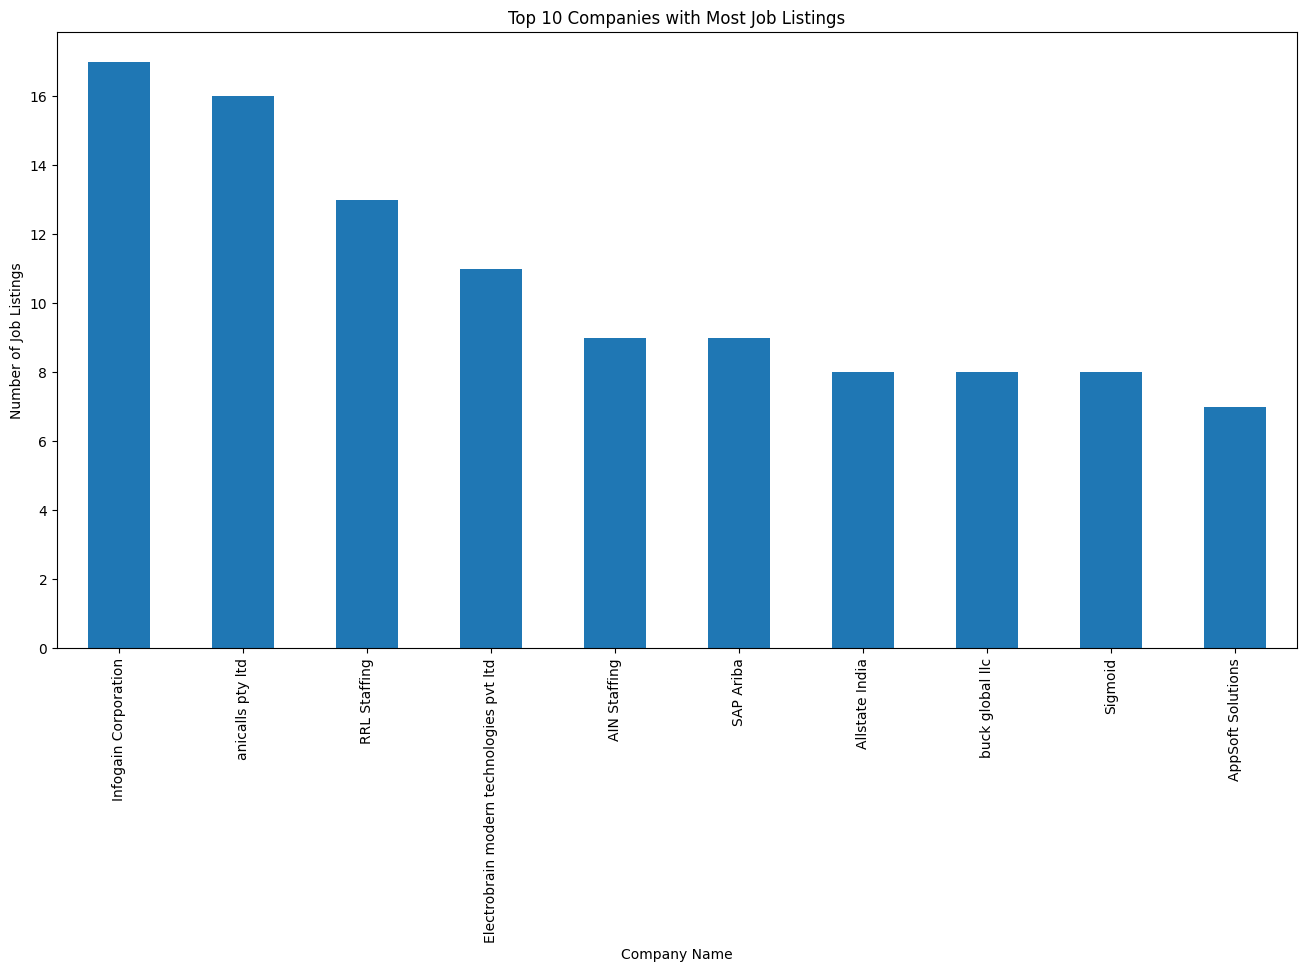

In [ ]:
# Count job listings by company
company_counts = df['Company_Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 8))
company_counts.plot(kind='bar')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Listings')
plt.title('Top 10 Companies with Most Job Listings')
plt.xticks(rotation=90)
plt.show()


**Insight:** Identifies companies with the highest number of job listings.

**Implications:** Job seekers can focus their applications on these companies, indicating high recruitment activity.

#### Chart - 2 Pie chart
**Purpose:** Display the proportion of job listings based on required experience levels.

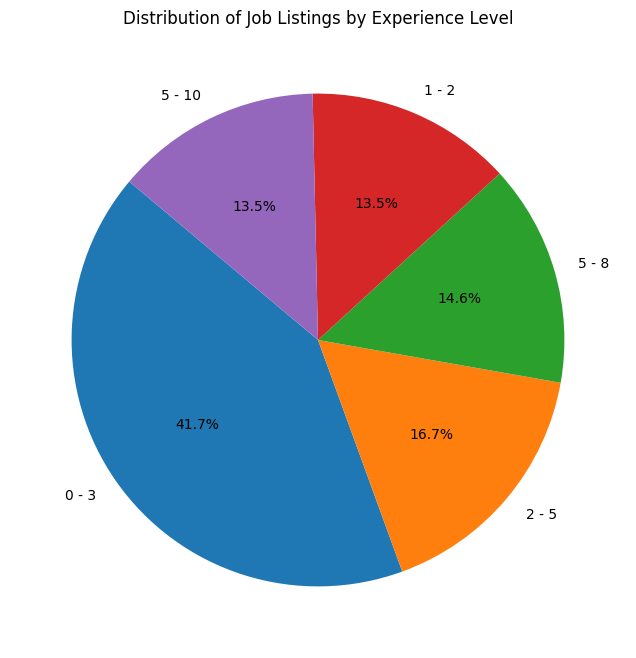

In [ ]:
# Count job listings by experience level
experience_counts = df['Experience'].value_counts().head(5)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Listings by Experience Level')
plt.show()


**Insight:** Shows the distribution of job listings based on experience requirements.The experience levels most in demand is 0-3 upto 26.9%.

**Implications:** Helps job seekers understand the experience levels most in demand. Employers can tailor job descriptions based on popular experience levels.

#### Chart - 3 Box plot
**Purpose:** Show the distribution of salary ranges.

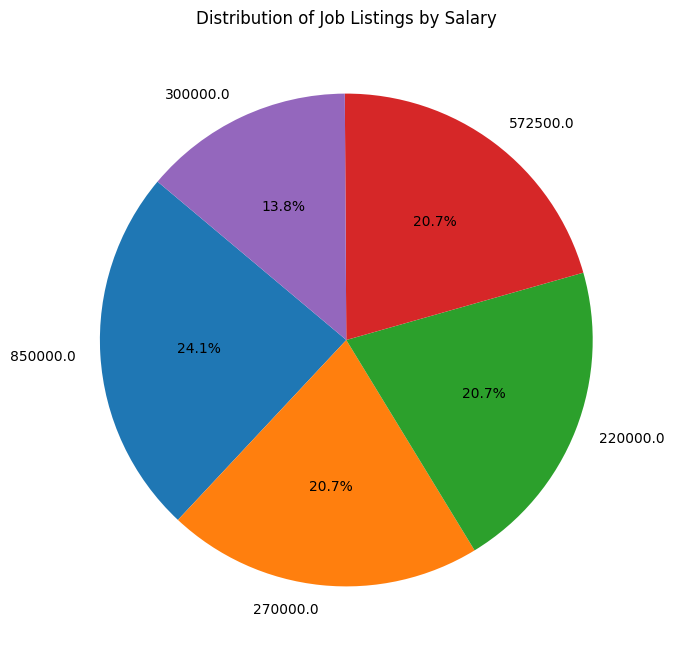

In [ ]:
# Remove 'Unknown' values
df_ = df[df['Salary'] != 'Unknown']

# Counts the top 5 most frequent salary values from the filtered DataFrame df_.
experience_counts = df_['Salary'].value_counts().head(5)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Listings by Salary')
plt.show()


**Insight:** Shows the distribution of job listings based on salary.The salary levels most in demand is 8.5 LPA upto 24.1%.

**Implications:** Helps job seekers understand the salary levels most in demand. Employers can tailor job descriptions based on popular salary levels.

#### Chart - 4 Word cloud
**Purpose:** Visualize the most frequently mentioned skills in job listings.

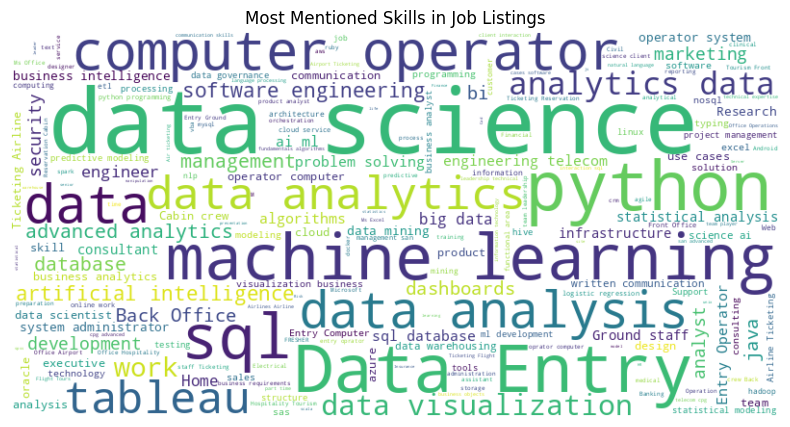

In [ ]:
from wordcloud import WordCloud

# Combine skills into a single string
skills_text = ' '.join(df['Skills_Required'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Mentioned Skills in Job Listings')
plt.show()


**Insight:** Highlights the most frequently mentioned skills in job listings.

**Implications:** Job seekers can prioritize learning or showcasing these skills. Employers can identify common skills in demand for potential training or recruitment strategies.

#### Chart - 5 Bar plot
**Purpose:** Show the distribution of job listings among different locations.

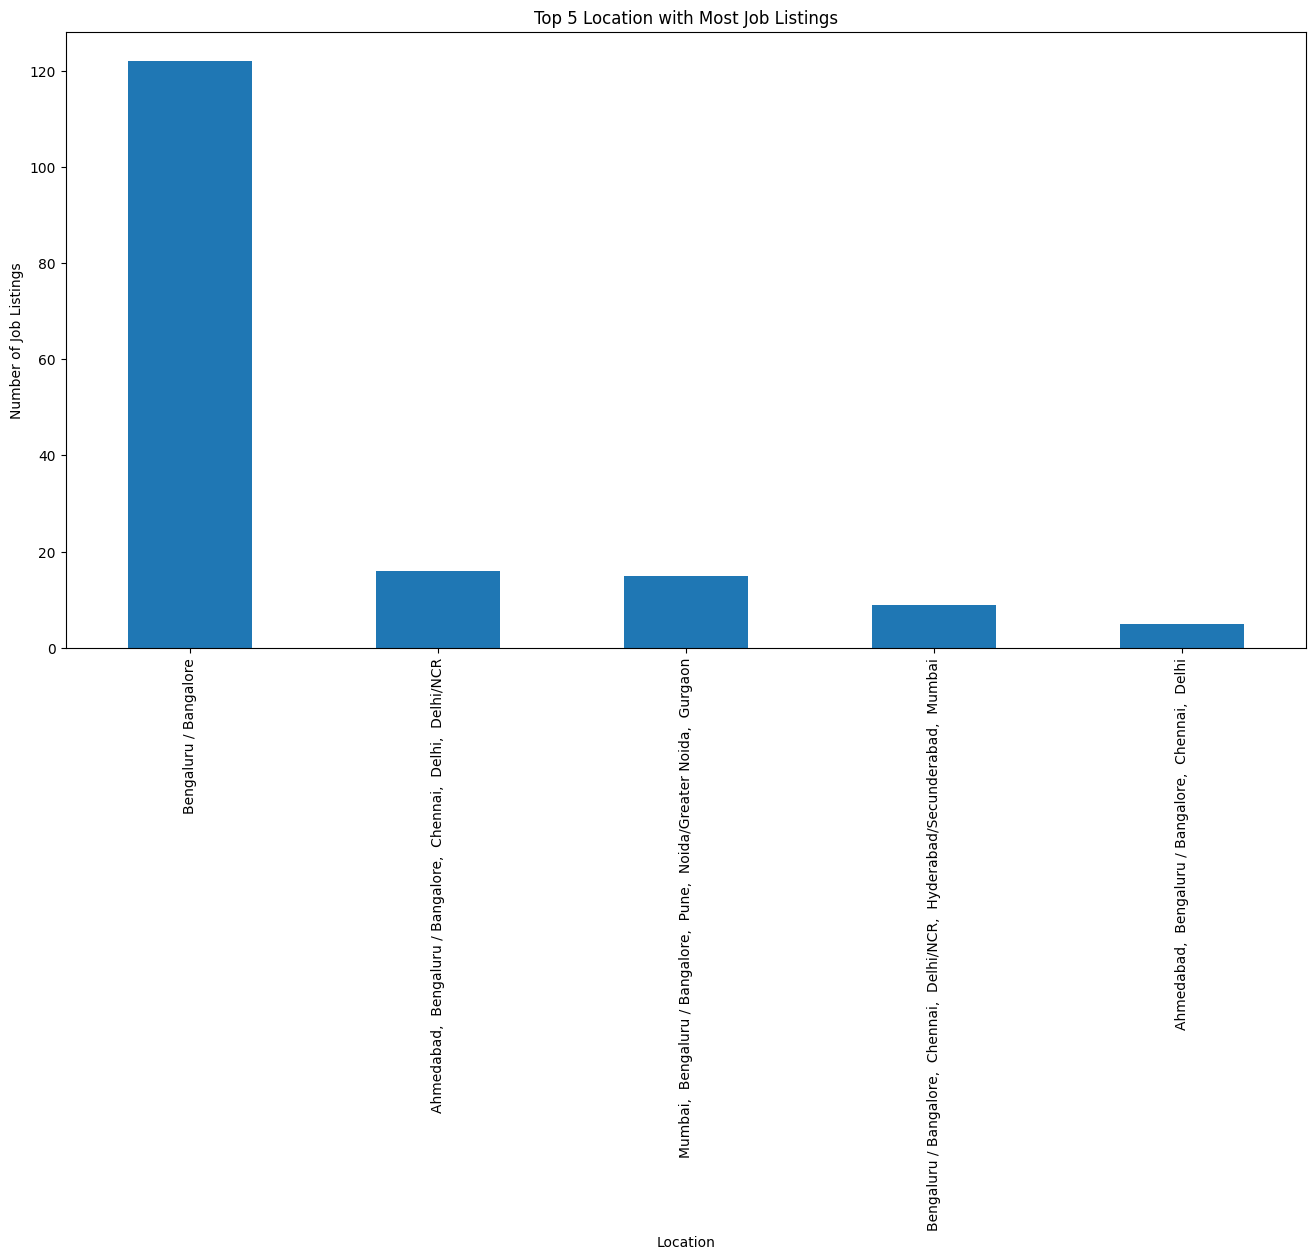

In [ ]:
# Count job listings by Location
company_counts = df['Location'].value_counts().head(5)

# Plotting
plt.figure(figsize=(16, 8))
company_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Job Listings')
plt.title('Top 5 Location with Most Job Listings')
plt.xticks(rotation=90)
plt.show()


**Insight:** Identifies locations with the highest number of job listings.

**Implications:** Job seekers can focus their applications on these location, indicating high recruitment activity.


## **Conclusion**

1. **Web Scraping Data:**
Objective: Gather data science job listings from timejob online platforms.
Approach: Utilize Python libraries like BeautifulSoup and requests to scrape job details including company names, skills required, experience levels, salaries, locations, and publish dates from multiple job portals.
Challenges: Adapt to evolving website structures and handle dynamic content.
2. **Data Cleaning and Preparation:**
Objective: Prepare the scraped data for analysis and visualization.
Steps: Remove irrelevant information, handle missing or inconsistent data, convert data types, and create a structured DataFrame.
Challenges: Dealing with 'Unknown' or missing values, standardizing publish date formats, and cleaning salary data.
3. **Data Analysis and Exploration:**
Objective: Explore the dataset to understand patterns and relationships within the job listings.
Analysis: Analyze job listings by company, experience level, salary range, required skills, and location data.
Visualizations: Utilize various charts (bar, pie, box, word cloud) to visualize the data and gain insights.
4. **Insights Gained:**
Job Listings by Company: Identified top companies with the most job listings.
Job Listings by Experience Level: Explored the distribution of job listings based on experience requirements.
Salary Ranges: Analyzed the distribution of salary ranges.
Skills Required: Visualized the most frequently mentioned skills in job listings.
Location Data: Explored regional job distribution trends.

### **Conclusion:**
**For Job Seekers:** Focus on companies with the most job listings, tailor applications based on popular skills and experience levels, and research salary expectations within the industry.

**For Employers/Recruiters:**Tailor job descriptions to match popular skills and experience levels, adjust salary offerings based on industry norms, and consider regional job distribution trends for recruitment strategies.